In [40]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from textblob import TextBlob
import nltk.corpus
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.datasets import make_blobs


from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

from wordcloud                        import WordCloud

In [34]:
df = pd.read_csv('C:/Users/gaby_/Desktop/Actuaría/Técnicas Estadísticas y Minería de Datos/Módulo IV Minería de Datos/Práctica/Datos_nu_1.csv')
df['Review_Text'].loc[6]

"Material and color is nice.  the leg opening is very large.  i am 5'1 (100#) and the length hits me right above my ankle.  with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy, i think you can imagine that it is not a flattering look.  if you are at least average height or taller, this may look good on you."

In [35]:
stop = text.ENGLISH_STOP_WORDS
def remove_noise(text):
    
    
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    
    
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    
    
    text = text.str.replace('[^\w\s]', '')
    
    
    text = text.str.replace('\d+', '')
    
    
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    
    text = text.astype(str)
        
    return text

df['Remove_Text'] = remove_noise(df['Review_Text'])
df.head()

,Unnamed: 0,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Remove_Text
0,3,847,47,This shirt is very flattering to all due to th...,5,1,6,shirt flattering adjustable tie perfect length...
1,4,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4,love tracy reese dresses petite just feet tall...
2,6,858,39,"I ordered this in carbon for store pick up, an...",4,1,4,ordered carbon store pick ton stuff try used p...
3,9,1077,53,Dress runs small esp where the zipper area run...,3,0,14,dress runs small esp zipper area runs ordered ...
4,10,1095,53,More and more i find myself reliant on the rev...,5,1,2,reliant reviews written savvy shoppers past ri...


In [36]:
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]
def remove_stopwords (txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)

    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   
        corpus[index] = corpus[index].replace(',', '')          
        corpus[index] = corpus[index].rstrip('\n')              
        corpus[index] = corpus[index].casefold()                
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) 
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)

        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)

        corpus[index]   = " ".join(listOfTokens)

    return corpus

language = 'english'
corpus=df['Remove_Text'].tolist()
corpus_2 = processCorpus(corpus, language)
corpus_2[0][0:40]

'shirt flatter adjust tie perfect length '

In [37]:
vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus_2)

tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

7230 rows


,0,1,2,3,4,5,6,7,8,9,...,7220,7221,7222,7223,7224,7225,7226,7227,7228,7229
shirt,0.457287,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
sleeveless,0.424011,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.178378,0.0,0.0
adjust,0.368633,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.196134,0.155081,0.0,0.0
cardigan,0.324466,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
tie,0.309522,0.0,0.0,0.0,0.0,0.0,0.0,0.197171,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [38]:
def top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

unigrams = top_n_words(corpus_2,50)
unigram_df = pd.DataFrame(unigrams, columns = ['Texto' , 'Repeticiones'])

print('Bag of Words')
unigram_df.head(11)

Bag of Words


,Texto,Repeticiones
0,dress,4406
1,fit,4128
2,size,4069
3,love,3524
4,look,3420
5,like,2970
6,wear,2694
7,color,2435
8,fabric,1894
9,order,1831


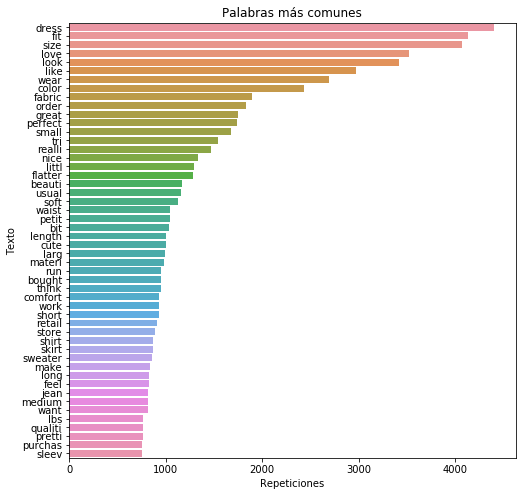

In [39]:
plt.figure(figsize=(8,8))
sns.barplot(unigram_df["Repeticiones"],unigram_df["Texto"])
plt.title("Palabras más comunes")
plt.xlabel("Repeticiones")
plt.ylabel("Texto")
plt.show()

# Análisis de Sentimientos

In [41]:
df['Review_Text_Polarizacion']=df['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(5)

,Unnamed: 0,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Remove_Text,Review_Text_Polarizacion
0,3,847,47,This shirt is very flattering to all due to th...,5,1,6,shirt flattering adjustable tie perfect length...,0.512891
1,4,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4,love tracy reese dresses petite just feet tall...,0.178750
2,6,858,39,"I ordered this in carbon for store pick up, an...",4,1,4,ordered carbon store pick ton stuff try used p...,0.171635
3,9,1077,53,Dress runs small esp where the zipper area run...,3,0,14,dress runs small esp zipper area runs ordered ...,-0.097149
4,10,1095,53,More and more i find myself reliant on the rev...,5,1,2,reliant reviews written savvy shoppers past ri...,0.244156


In [42]:
df['Review_Text_Polarizacion'].mean()

0.2246083456345135

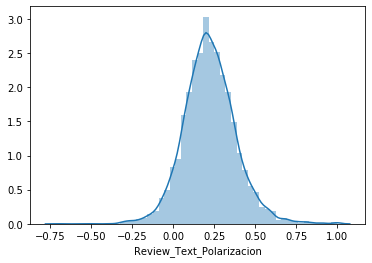

In [43]:
sns.distplot(df['Review_Text_Polarizacion'])

Recommended_IND
0    0.126196
1    0.251486
Name: Review_Text_Polarizacion, dtype: float64

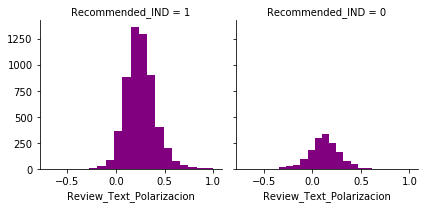

In [44]:
g = sns.FacetGrid(df, col="Recommended_IND", col_order=[1, 0])
g = g.map(plt.hist, "Review_Text_Polarizacion", bins=20, color="purple")

recommend = df.groupby(['Recommended_IND'])
recommend['Review_Text_Polarizacion'].mean()